In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
orders = pd.read_csv(
    "/content/olist_orders_dataset.csv",
    parse_dates=["order_purchase_timestamp"]
)

customers = pd.read_csv("/content/olist_customers_dataset.csv")


In [3]:
orders_delivered = orders[orders["order_status"] == "delivered"]

orders_delivered = orders_delivered.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id"
)


In [4]:
orders_delivered["cohort_month"] = (
    orders_delivered
    .groupby("customer_unique_id")["order_purchase_timestamp"]
    .transform("min")
    .dt.to_period("M")
)

orders_delivered["order_month"] = (
    orders_delivered["order_purchase_timestamp"]
    .dt.to_period("M")
)


In [5]:
cohort_data = (
    orders_delivered
    .groupby(["cohort_month", "order_month"])
    ["customer_unique_id"]
    .nunique()
    .reset_index()
)

cohort_matrix = cohort_data.pivot(
    index="cohort_month",
    columns="order_month",
    values="customer_unique_id"
)

cohort_sizes = cohort_matrix.iloc[:, 0]
retention = cohort_matrix.divide(cohort_sizes, axis=0)


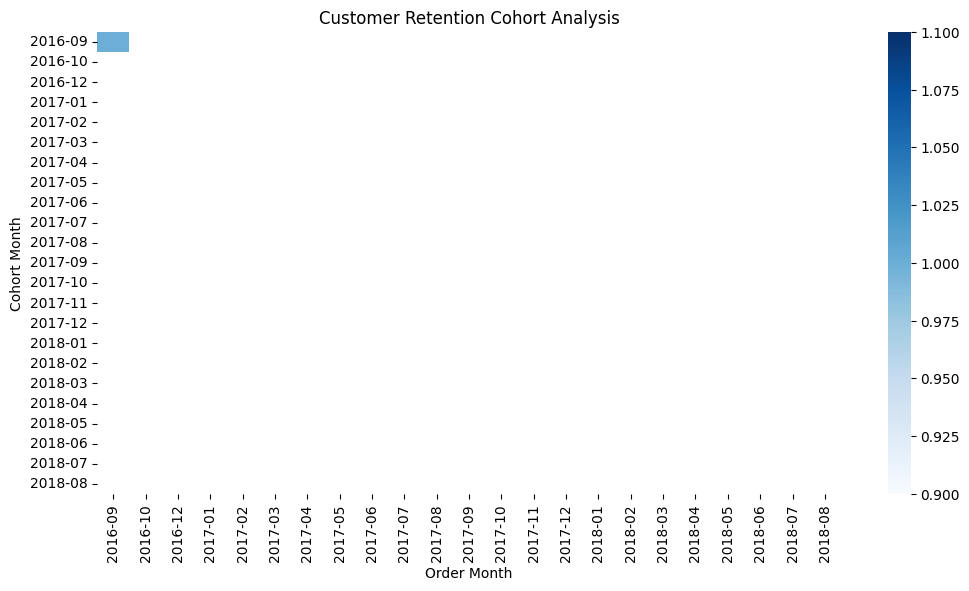

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(retention, cmap="Blues", annot=False)
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Order Month")
plt.show()


Customer retention drops sharply after the first purchase month.
Most cohorts lose the majority of customers within 1–2 months.
Revenue growth is therefore highly dependent on continuous new customer acquisition.